In [1]:
%matplotlib inline
import sys
import numpy as np
import pylab as plt
import pandas as pd
import scipy.stats as stats
from astropy.table import Table
from astropy.io import fits
import healpy as hp
from healpy.newvisufunc import projview, newprojplot

In [2]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing plotting and locus tools: 
sys.path.append('src')
import DataPreprocessing as pp
import Plots as pt
import healpy_utils as hpu 

# FGKM Gaia DR3 sample

In [3]:
# FGKM golden sample from Gaia DR3
fgkm = pd.read_csv("../data/fgkm_master0.csv") #3273041
print(len(fgkm))

## derive additional quantities, such as cartesian positions and velocities 
pp.preprocessData(fgkm)

fgkm.columns

3273041
done!


Index(['source_id', 'ra', 'dec', 'l', 'b', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'pmra_pmdec_corr', 'radial_velocity',
       'radial_velocity_error', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'bp_rp', 'g_rp', 'teff_gspphot', 'logg_gspphot',
       'mh_gspphot', 'ag_gspphot', 'ebpminrp_gspphot', 'alphafe_gspspec',
       'teff_gspspec', 'logg_gspspec', 'mh_gspspec', 'radius_flame',
       'lum_flame', 'mass_flame', 'age_flame', 'evolstage_flame',
       'radius_flame_spec', 'lum_flame_spec', 'mass_flame_spec',
       'age_flame_spec', 'evolstage_flame_spec', 'spectraltype_esphs',
       'r_med_geo', 'r_lo_geo', 'r_hi_geo', 'r_med_photogeo', 'r_lo_photogeo',
       'r_hi_photogeo', 'original_ext_source_id', 'psfmag_u', 'psfmag_g',
       'psfmag_r', 'psfmag_i', 'psfmag_z', 'psfmagerr_u', 'psfmagerr_g',
       'psfmagerr_r', 'psfmagerr_i', 'psfmagerr_z', 'dist', 'Dkpc', 'DM', 'ug',
       'gr', 'ri', 'iz', 'gi', 'X', 'Y', 'Z', 'R', 'phi', 'pmL

## Distribution of FGKM sample

made plot: ../plots/HRdiagram.png


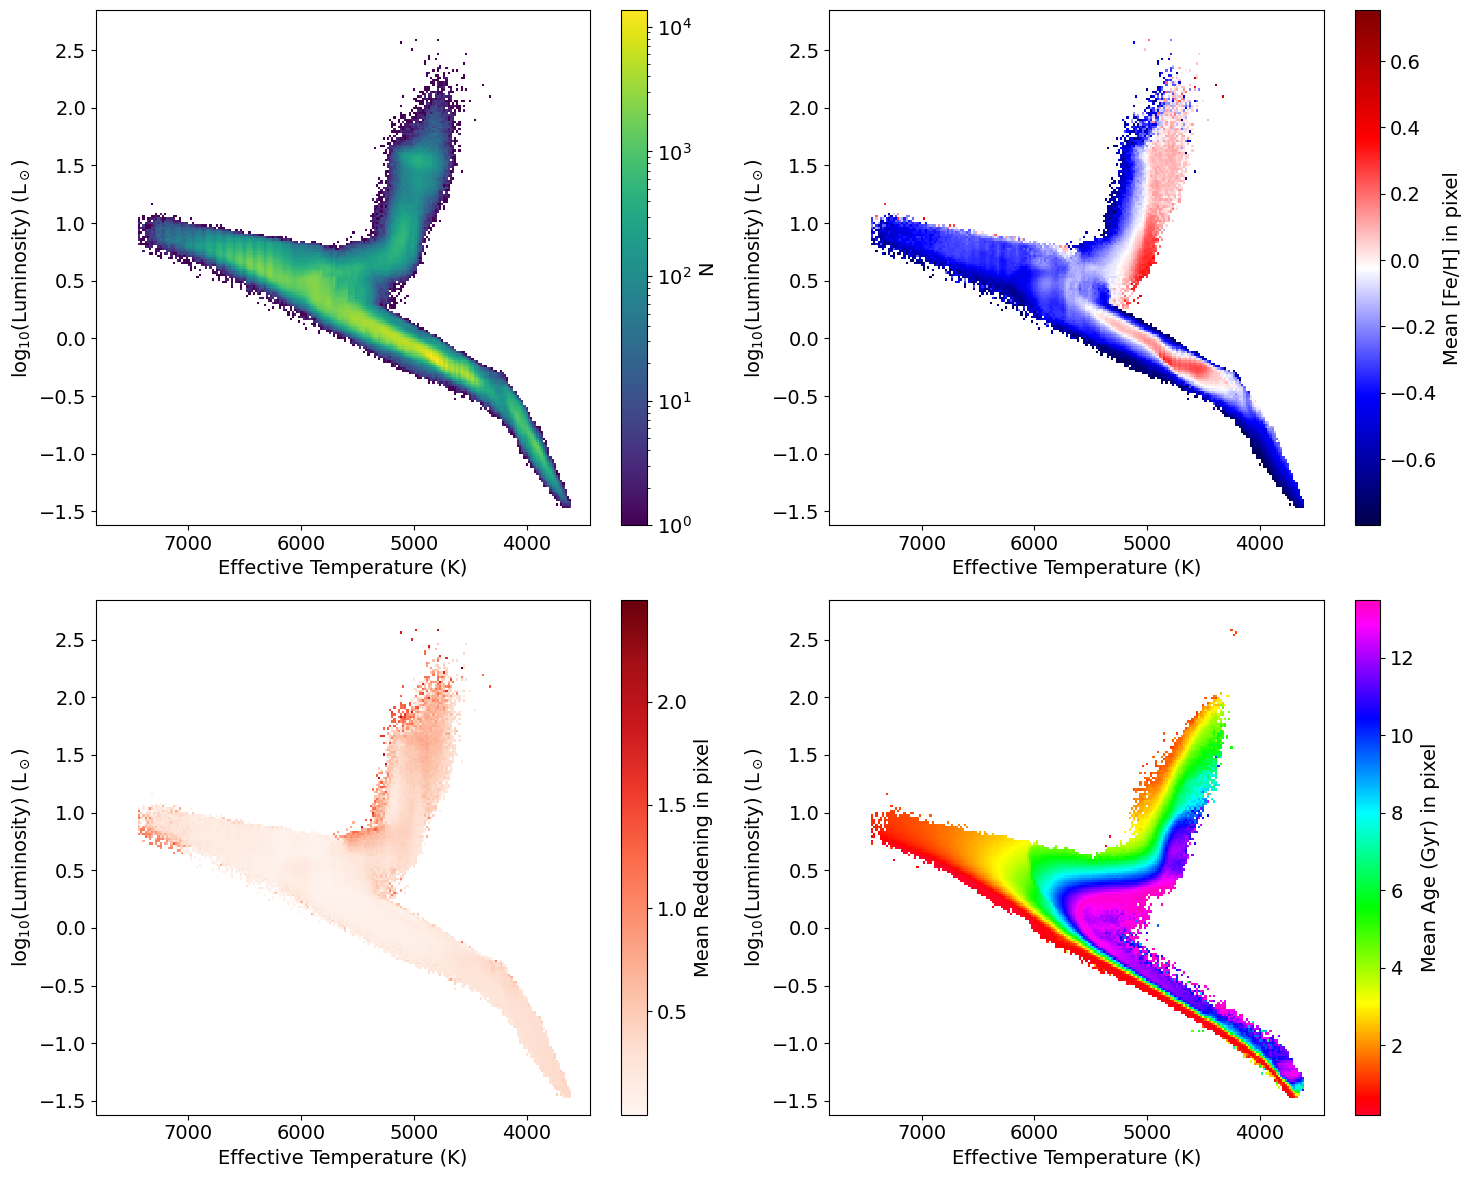

In [4]:
import warnings
warnings.filterwarnings('ignore', module='astroML.stats')

#Fig1
pt.plotHRdiagram(fgkm)
!mv '../plots/HRdiagram.png' '../plots/HRdiagramfgkm.png'

made plot: ../plots/plotXYZ.png


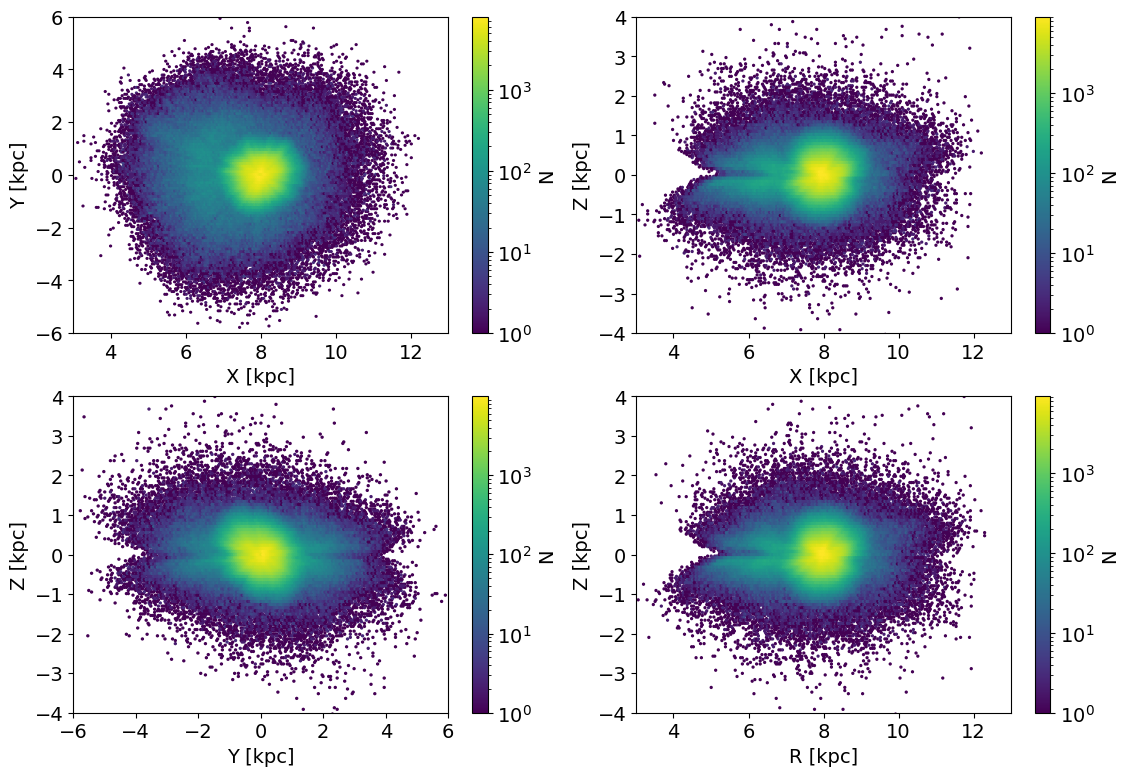

In [5]:
#Fig2
pt.plotXYZ(fgkm)
!mv '../plots/plotXYZ.png' '../plots/plotXYZfgkm.png'

## Velocity variation as function of Z

In [6]:
# NGP subsample (all high FeH: minimum is -0.8)
# vr nan
mask_rv = fgkm['radial_velocity_error']==-99. #(~mask_rv).sum()=1746400
mask_bN = fgkm['b']>80
mask_bS = fgkm['b']<-80

X = fgkm['X']
Y = fgkm['Y']
Z = fgkm['Z']

dist = np.sqrt((X-8)**2+Y**2+Z**2)
distMax = 300  # pc
mask_near = (fgkm['dist']<distMax)  
mask_Eggen = (fgkm['dist']>50) & (fgkm['dist']<100)
mask_Dslice = (fgkm['dist']>400) & (fgkm['dist']<600)  

Zmin = 0.4  # kpc
Zmax = 0.6  # kpc
mask_ZsliceN = (fgkm['Z']>Zmin) & (fgkm['Z']<Zmax)  
mask_ZsliceS = (fgkm['Z']>-Zmax) & (fgkm['Z']<-Zmin)

mask_hot = (fgkm['teff_gspphot']>6500)

ngp = fgkm[~mask_rv & mask_bN]         #   6,548  
sgp = fgkm[~mask_rv & mask_bS]         #   7,578   
near = fgkm[~mask_rv & mask_near]      # 276,453  
Dslice = fgkm[mask_Dslice]             # 868,859   nb no rv mask - this is for proper motion test 
Eggen = fgkm[mask_Eggen]               #  15,648   for moving groups
ZsliceN = fgkm[mask_ZsliceN]           # 237,660   for moving groups
ZsliceS = fgkm[mask_ZsliceS]           # 259,868   for moving groups
hot = fgkm[mask_hot]                   #  64,012   hot but also age<2 Gyr, for kinematic differences 
hotnear = fgkm[~mask_rv & mask_hot & mask_near]  # 6,108 

new model: -189.59969390544967 27.78284666549056
made plot: ../plots/plot3VvsZ.png


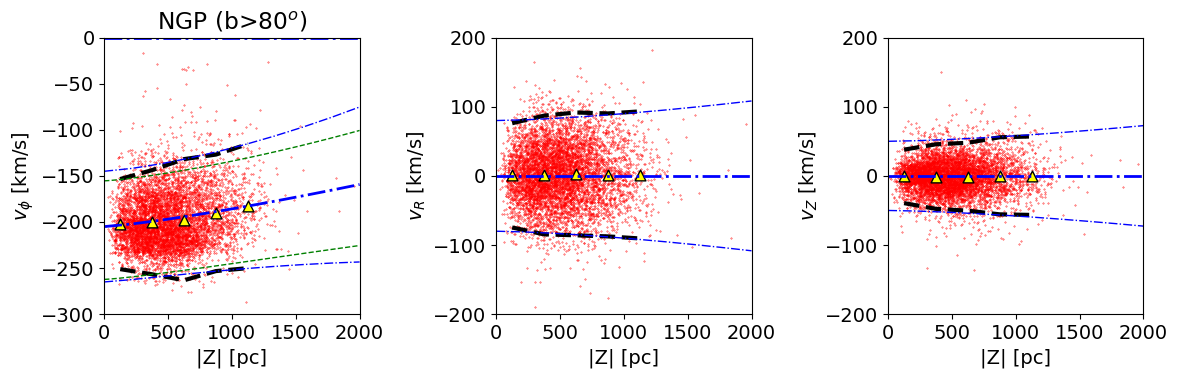

new model: -189.59969390544967 27.78284666549056
made plot: ../plots/plot3VvsZ.png


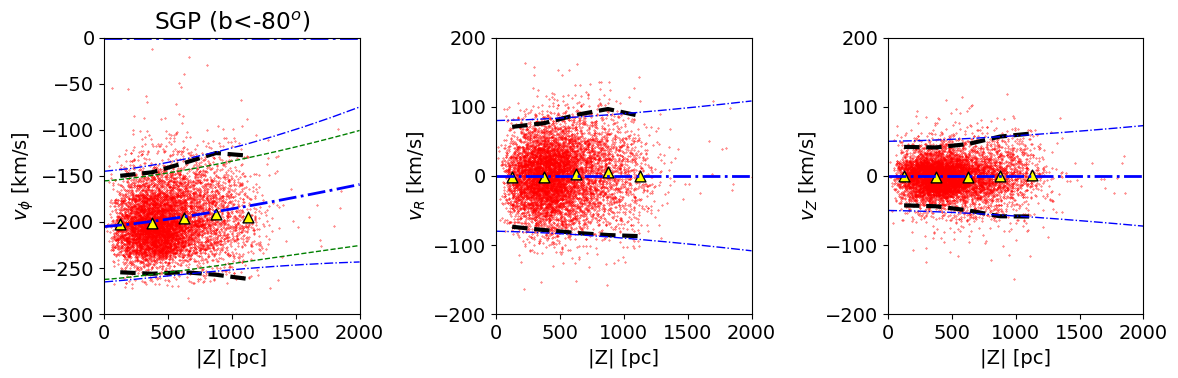

In [8]:
#Fig5
pt.plot3VvsZ(ngp, 'NGP (b>80$^o$)')
!mv '../plots/plot3VvsZ.png' '../plots/plot3VvsZ_NGP.png'

#Fig6
pt.plot3VvsZ(sgp, 'SGP (b<-80$^o$)')
!mv '../plots/plot3VvsZ.png' '../plots/plot3VvsZ_SGP.png'

## Comparison of the observed rotational velocity distribution

6548 4002 7578 4556
6548 833 7578 931
made plot: ../plots/plotVphiDistr4.png


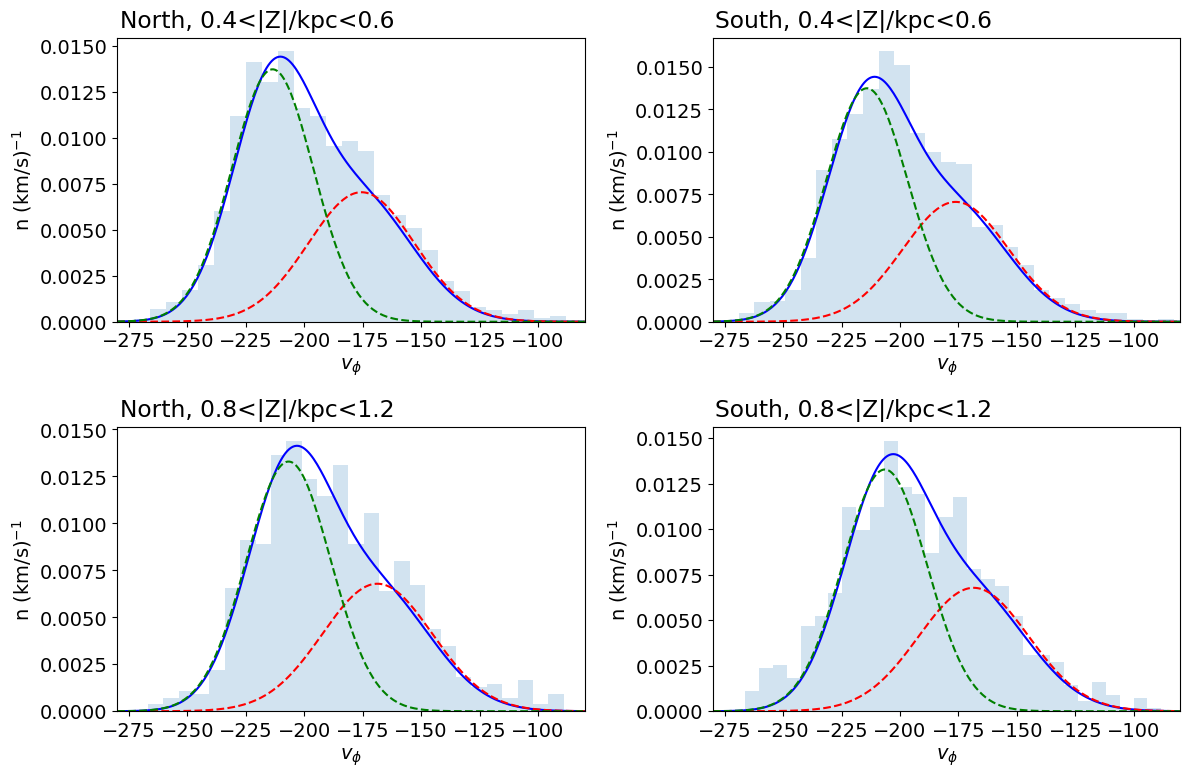

In [9]:
#Fig7

Zmin = 0.4  # kpc
Zmax = 1.6  # kpc
df = ngp
#df = fgkmRV  
maskZslice = (df['Z']>Zmin)&(df['Z']<Zmax)  
ZsliceNg = df[maskZslice&(df['v_phi']>-300)&(df['v_phi']<-80)]
df = sgp
#df = fgkmRV
maskZslice = (df['Z']>-Zmax)&(df['Z']<-Zmin)  
ZsliceSg = df[maskZslice&(df['v_phi']>-300)&(df['v_phi']<-80)]
print(len(ngp), len(ZsliceNg), len(sgp), len(ZsliceSg))


Zmin = 0.8  # kpc
Zmax = 1.2  # kpc
df = ngp
#df = fgkmRV 
maskZslice = (df['Z']>Zmin)&(df['Z']<Zmax)  
ZsliceNg2 = df[maskZslice&(df['v_phi']>-300)&(df['v_phi']<-80)]
df = sgp
#df = fgkmRV 
maskZslice = (df['Z']>-Zmax)&(df['Z']<-Zmin)  
ZsliceSg2 = df[maskZslice&(df['v_phi']>-300)&(df['v_phi']<-80)]
print(len(ngp), len(ZsliceNg2), len(sgp), len(ZsliceSg2))


vPhiMin = -320
vPhiMax = -50
vPhiMin = -280
vPhiMax = -80
Zarr = {}
vPhiArr = {}
titles = {}
#
df = ZsliceNg
Zarr[0] = np.abs(df['Z'])
vPhiArr[0] = df['v_phi']
titles[0] = 'North, 0.4<|Z|/kpc<0.6'
#
df = ZsliceSg
Zarr[1] = np.abs(df['Z'])
vPhiArr[1] = df['v_phi']
titles[1] = 'South, 0.4<|Z|/kpc<0.6'
#
df = ZsliceNg2
Zarr[2] = np.abs(df['Z'])
vPhiArr[2] = df['v_phi']
titles[2] = 'North, 0.8<|Z|/kpc<1.2'
#
df = ZsliceSg2
Zarr[3] = np.abs(df['Z'])
vPhiArr[3] = df['v_phi']
titles[3] = 'South, 0.8<|Z|/kpc<1.2'
###
pt.plotVphiDistr4(Zarr, vPhiArr, vPhiMin, vPhiMax, titles)

!mv '../plots/plotVphiDistr4.png' '../plots/plotVphiDistr4FGKM.png'

## Healpy sky maps

In [10]:
pmMax = 30
df=Dslice
maskpm = (df['pmL']>-pmMax) & (df['pmL']<pmMax) & (df['pmB']>-pmMax) & (df['pmB']<pmMax)
DsliceRV = fgkm[~mask_rv & mask_Dslice & maskpm]  # 400,782 from 868,859
print(len(Dslice), len(DsliceRV))

868859 400782


In [11]:
#Fig9
# bin proper motions and radial velocity in galactic coordinates
pmLongM, pmLongS, pmLatM, pmLatS, radvelM, radvelS = pp.getHealpyBins(DsliceRV, nside=32)

smoothingScale = 0.1
pmLongMs = hp.smoothing(pmLongM, fwhm=np.radians(smoothingScale))
pmLatMs = hp.smoothing(pmLatM, fwhm=np.radians(smoothingScale))
radvelMs = hp.smoothing(radvelM, fwhm=np.radians(smoothingScale))

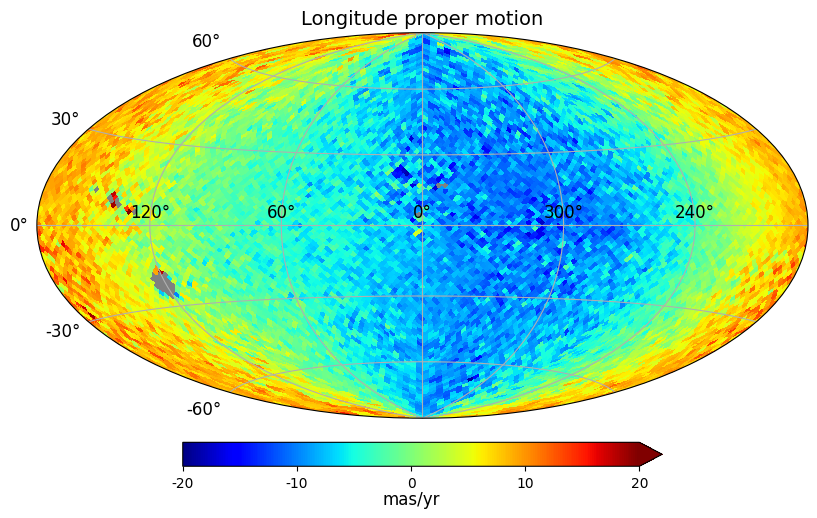

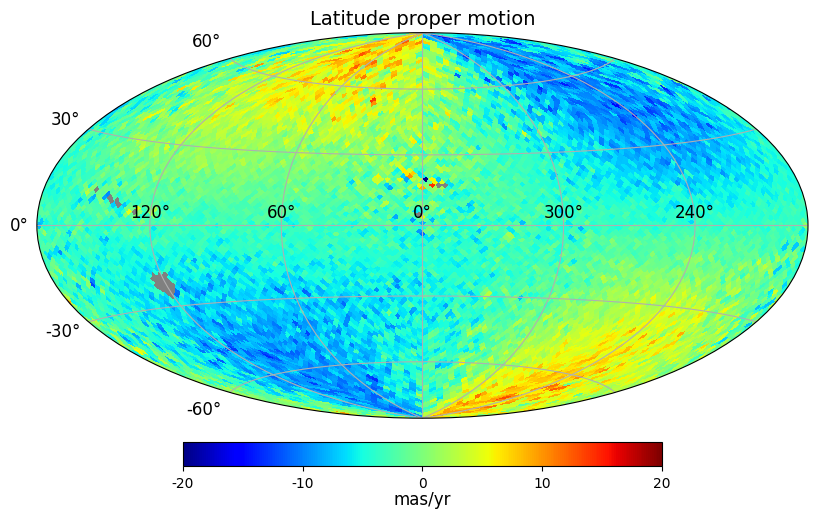

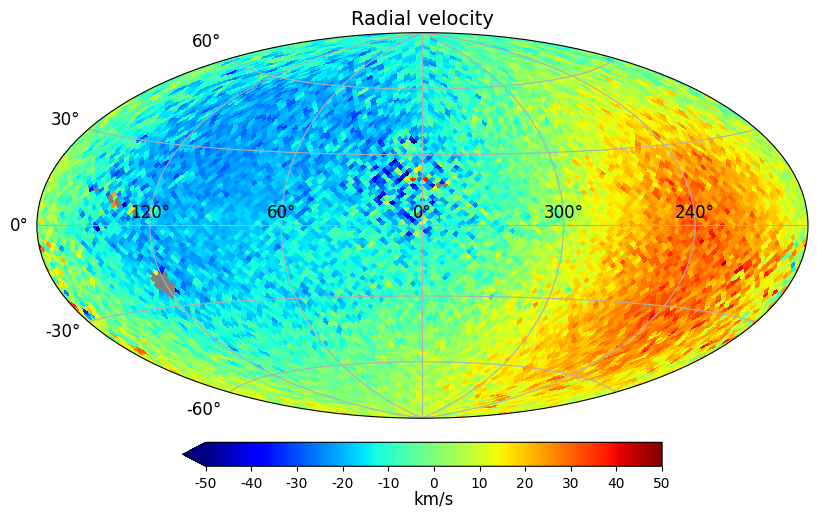

In [12]:
mycmap = 'jet'

# Healpy polar plots for pmra, pmdec, and radial velocity using mean as applied function. Also, has rotation applied from celestial to galactic coordinates.
projview(pmLongMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Longitude proper motion", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLongDataFGKM.png')

projview(pmLatMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Latitude proper motion", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLatDataFGKM.png')

projview(radvelMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Radial velocity", coord=['G'], unit="km/s", \
         min=-50, max=50, cmap=mycmap, cbar_ticks=(-50, -40, -30,-20,-10,0,10,20,30,40,50), remove_dip=False)
plt.savefig('../plots/projview_radVelDataFGKM.png')

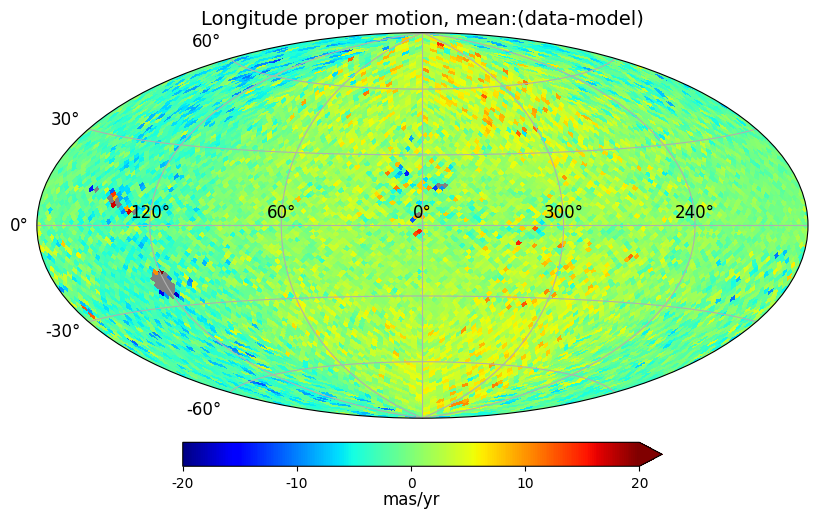

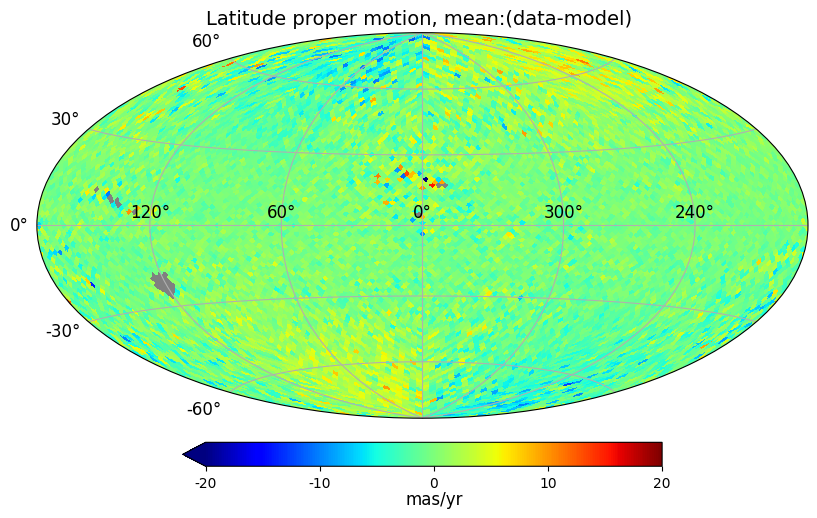

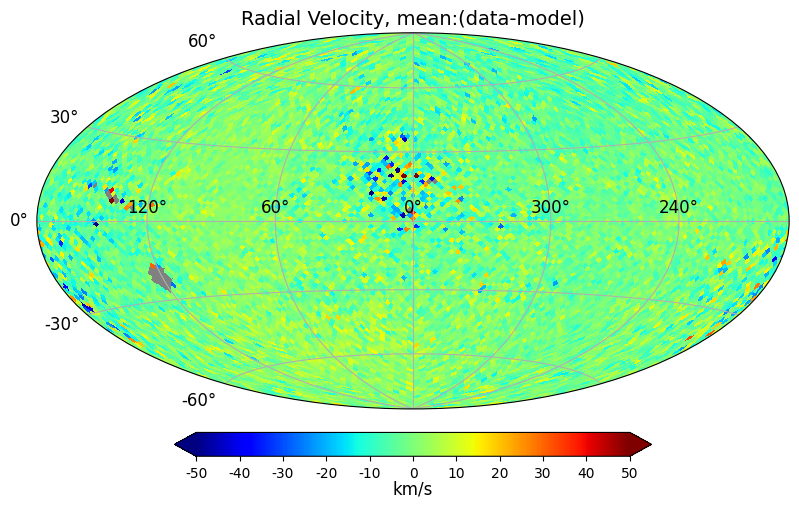

In [13]:
# bin proper motions and radial velocity in galactic coordinates

DMpmLongM, CMpmLongS, DMpmLatM, CMpmLatS, DMradvelM, CMradvelS = pp.getHealpyBinsModels(DsliceRV, nside=32)

smoothingScale = 1.0
DMpmLongMs = hp.smoothing(DMpmLongM, fwhm=np.radians(smoothingScale))
DMpmLatMs = hp.smoothing(DMpmLatM, fwhm=np.radians(smoothingScale))
DMradvelMs = hp.smoothing(DMradvelM, fwhm=np.radians(smoothingScale))

# Healpy polar plots for pmra, pmdec, and radial velocity using mean as applied function. Also, has rotation applied from celestial to galactic coordinates.
projview(DMpmLongM, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Longitude proper motion, mean:(data-model)", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLongDMresiduals_DsliceRV_FGKM.png')

projview(DMpmLatM, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Latitude proper motion, mean:(data-model) ", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLatDMresiduals_DsliceRV_FGKM.png')

projview(DMradvelM, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Radial Velocity, mean:(data-model)", coord=['G'], unit="km/s", \
         min=-50, max=50, cmap=mycmap, cbar_ticks=(-50, -40, -30,-20,-10,0,10,20,30,40,50), remove_dip=False)
plt.savefig('../plots/projview_radVelDMresiduals_DsliceRV_FGKM.png')

plt.tight_layout()

## v_phi vs v_R

made plot: ../plots/plotVvsVtriple.png


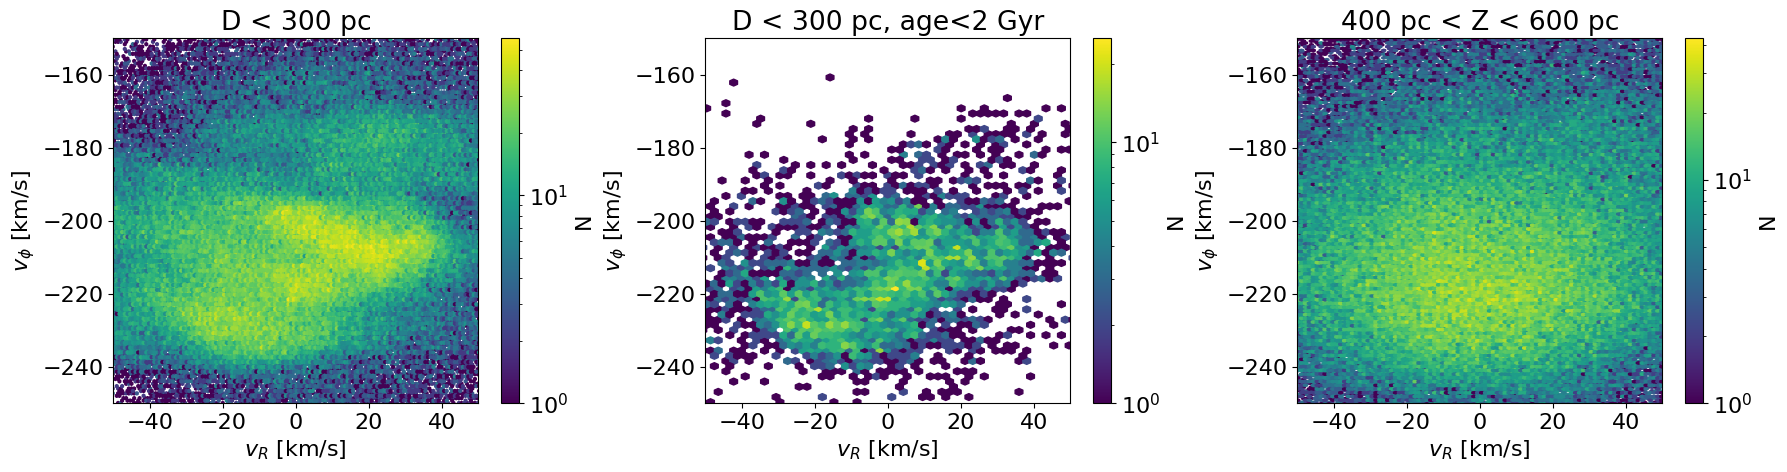

In [14]:
#Fig13
vX = {}
vY = {}
title = {}
vX[0] = near['v_R']
vY[0] = near['v_phi']
title[0] = 'D < 300 pc'

vX[1] = hotnear['v_R']
vY[1] = hotnear['v_phi']
title[1] = 'D < 300 pc, age<2 Gyr'

vX[2] = ZsliceN['v_R'] 
vY[2] = ZsliceN['v_phi']
title[2] = '400 pc < Z < 600 pc'

pt.plotVvsVtriple(vX, vY, '$v_R$ [km/s]', '$v_\\phi$ [km/s]', -50, 50, -250, -150, title=title)
!mv '../plots/plotVvsVtriple.png' '../plots/plotVvsVtripleFGKM.png'

# Red giants from Andrae+2023

In [3]:
# Red giant catalog from Andrae+2023 
# rgAll = pd.read_csv("../data/andrae.csv.gz", index_col="source_id", memory_map=True) #17558141
f = fits.open('../data/andrae.fit', memmap=True) #17558141
rgAll = Table(f[1].data)
rg = rgAll[~np.isnan(rgAll['radial_velocity'])].copy() #12575164
print(len(rgAll), len(rg))

# derive additional quantities, such as cartesian positions and velocities 
pp.preprocessDataGiants(rg)

np.array(list(rg.columns))

17558141 12575164
done with giants!


array(['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra',
       'pmdec', 'radial_velocity', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'mh_xgboost', 'piSNR', 'Dkpc', 'dist', 'DM',
       'BpRp', 'G', 'FeH', 'l', 'b', 'X', 'Y', 'Z', 'R', 'phi', 'pmL',
       'pmB', 'vL', 'vB', 'vradGal', 'vX_obs', 'vY_obs', 'vZ_obs', 'v_X',
       'v_Y', 'v_Z', 'v_R', 'v_phi', 'Rgc', 'v_r', 'v_th'], dtype='<U16')

## Distribution of Red Giants

In [ ]:
# solar cylinder subsample  
df = rg
mask_cyl = (df['R']>7.0) & (df['R']<10.0)
mask_rv = (df['v_phi']>-1000.0) & (df['v_phi']<1000.0)
cyl = df[mask_rv & mask_cyl]          #   2,510,868  

Dall = rg[rg['FeH']>-0.5]

D = cyl[cyl['FeH']>-0.5]  # 4.30 million for > -0.5
H = cyl[cyl['FeH']<-1.2]
S1 = cyl[(np.abs(cyl['Z'])>2) & (np.abs(cyl['Z'])<3)]
S2 = cyl[(np.abs(cyl['Z'])>3) & (np.abs(cyl['Z'])<4)]
S3 = cyl[(np.abs(cyl['Z'])>4) & (np.abs(cyl['Z'])<6)]
print(len(cyl), len(D), len(H), len(S1), len(S2), len(S3))

# Andrae, Rix & Chandra: Fig. 18: 283,616 ``vetted'' RGB stars with FeH < -1.2; here 283,544 
HaNV = rg[(rg['FeH']<-1.2)]
Ha = rg[(rg['FeH']<-1.2) & (rg['v_phi']>-2000.0) & (rg['v_phi']<2000.0)]
SH = Ha[(np.abs(Ha['Z'])>4) & (np.abs(Ha['Z'])<6)]
SH1 = SH[(SH['R']>4) & (SH['R']<7)]
SH2 = SH[(SH['R']>13) & (SH['R']<15)]
print(len(HaNV), len(Ha), len(SH), len(SH1), len(SH2))

In [ ]:
#Fig3
vX = {}
vY = {}
title = {}

vX[0] = S1['FeH'] 
vY[0] = S1['v_phi']
title[0] = 'giants, 2<|Z/kpc|<3'

vX[1] = S2['FeH'] 
vY[1] = S2['v_phi']
title[1] = 'giants, 3<|Z/kpc|<4'

vX[2] = S3['FeH'] 
vY[2] = S3['v_phi']
title[2] = 'giants, 4<|Z/kpc|<6'
pt.plotVvsVtriple(vX, vY, '[Fe/H]', '$v_\\phi$ [km/s]', -2.5, 0.5, -300, 200, title=title, gridsize=100, giants=True)

!mv '../plots/plotVvsVtriple.png' '../plots/plotVvsVtriple_HvsD_Zslices.png'

In [ ]:
#Fig4
pt.plotXYZgiants(Ha)
!mv '../plots/plotXYZ.png' '../plots/plotXYZgiantsH.png'

## Velocity variation as function of Z

In [ ]:
#Fig 6 --> 7kpc < R < 10kpc, [Fe/H]> −0.5
pt.plot3VvsZgiants(D, '              7 kpc < R < 10 kpc, [Fe/H] > -0.5\n')
!mv '../plots/plot3VvsZ.png' '../plots/plot3VvsZ_giantsD.png'

In [ ]:
#Fig11 --> 7kpc < R < 10kpc, [Fe/H]< −1.2
pt.plot3VvsZgiants(H, '                7 kpc < R < 10 kpc, [Fe/H] < -1.2', disk=False)
!mv '../plots/plot3VvsZ.png' '../plots/plot3VvsZ_giantsH.png'

## Comparison of the observed rotational velocity distribution

In [ ]:
#Fig8
mask_b = np.abs(D['b'])>60
Dp = D[mask_b]   
# print(len(Dp))

df = Dp
Zmin = 0.4  # kpc
Zmax = 0.6  # kpc
maskZslice = (np.abs(df['Z'])>Zmin) & (np.abs(df['Z'])<Zmax)  
Zslice1 = df[maskZslice & (df['v_phi']>-300) & (df['v_phi']<-80)]

Zmin = 0.8  # kpc
Zmax = 1.2  # kpc
maskZslice = (np.abs(df['Z'])>Zmin) & (np.abs(df['Z'])<Zmax)  
Zslice2 = df[maskZslice & (df['v_phi']>-300) & (df['v_phi']<-80)]
# print(len(Zslice1), len(Zslice2))

Zmin = 1.4  # kpc
Zmax = 1.6  # kpc
maskZslice = (np.abs(df['Z'])>Zmin) & (np.abs(df['Z'])<Zmax)  
Zslice3 = df[maskZslice & (df['v_phi']>-300) & (df['v_phi']<-80)]

Zmin = 1.8  # kpc
Zmax = 2.0  # kpc
maskZslice = (np.abs(df['Z'])>Zmin) & (np.abs(df['Z'])<Zmax)  
Zslice4 = df[maskZslice & (df['v_phi']>-300) & (df['v_phi']<-80)]
# print(len(Zslice3), len(Zslice4))

vPhiMin = -320
vPhiMax = -50
vPhiMin = -280
vPhiMax = -80
Zarr = {}
vPhiArr = {}
titles = {}
#
df = Zslice1
Zarr[0] = np.abs(df['Z'])
vPhiArr[0] = df['v_phi']
titles[0] = '     Red giants, 0.4<|Z|/kpc<0.6'
#
df = Zslice2
Zarr[1] = np.abs(df['Z'])
vPhiArr[1] = df['v_phi']
titles[1] = '0.8<|Z|/kpc<1.2'
#
df = Zslice3
Zarr[2] = np.abs(df['Z'])
vPhiArr[2] = df['v_phi']
titles[2] = '1.2<|Z|/kpc<1.4'
#
df = Zslice4
Zarr[3] = np.abs(df['Z'])
vPhiArr[3] = df['v_phi']
titles[3] = '1.8<|Z|/kpc<2.0'
###
pt.plotVphiDistr4(Zarr, vPhiArr, vPhiMin, vPhiMax, titles)

!mv '../plots/plotVphiDistr4.png' '../plots/plotVphiDistr4rg.png'

## Healpy sky maps

In [ ]:
#Fig10
df = Dall  # 14,797,694
pmMax = 30
mask_rv = np.abs(df['radial_velocity'])<500
#mask_Dslice = (df['Dkpc']>1.4)&(df['Dkpc']<1.6)    #   444,108
#mask_Dslice = (df['Dkpc']>2.4)&(df['Dkpc']<2.6)    #   570,613
mask_Dslice = (df['Dkpc']>2.8) & (df['Dkpc']<3.2)    # 1,052,476 
maskpm = (df['pmL']>-pmMax) & (df['pmL']<pmMax) & (df['pmB']>-pmMax)&(df['pmB']<pmMax)
DsliceRV = df[mask_Dslice & maskpm]  
print(len(DsliceRV))

In [ ]:
# bin proper motions and radial velocity in galactic coordinates
pmLongM, pmLongS, pmLatM, pmLatS, radvelM, radvelS = pp.getHealpyBins(DsliceRV, nside=32)

mycmap = 'jet'
smoothingScale = 1.0
pmLongMs = hp.smoothing(pmLongM, fwhm=np.radians(smoothingScale))
pmLatMs = hp.smoothing(pmLatM, fwhm=np.radians(smoothingScale))
radvelMs = hp.smoothing(radvelM, fwhm=np.radians(smoothingScale))

# Healpy polar plots for pmra, pmdec, and radial velocity using mean as applied function. Also, has rotation applied from celestial to galactic coordinates.
projview(pmLongMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Longitude proper motion", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLongDataRG.png')

projview(pmLatMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Latitude proper motion", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLatDataRG.png')

projview(radvelMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Radial velocity", coord=['G'], unit="km/s", \
         min=-50, max=50, cmap=mycmap, cbar_ticks=(-50, -40, -30,-20,-10,0,10,20,30,40,50), remove_dip=False)
plt.savefig('../plots/projview_radVelDataRG.png')

In [ ]:
# bin proper motions and radial velocity in galactic coordinates
DMpmLongM, CMpmLongS, DMpmLatM, CMpmLatS, DMradvelM, CMradvelS = pp.getHealpyBinsModels(DsliceRV, nside=32)

smoothingScale = 1.0
DMpmLongMs = hp.smoothing(DMpmLongM, fwhm=np.radians(smoothingScale))
DMpmLatMs = hp.smoothing(DMpmLatM, fwhm=np.radians(smoothingScale))
DMradvelMs = hp.smoothing(DMradvelM, fwhm=np.radians(smoothingScale))

# Healpy polar plots for pmra, pmdec, and radial velocity using mean as applied function. Also, has rotation applied from celestial to galactic coordinates.
projview(DMpmLongMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Longitude proper motion, mean:(data-model)", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLongDMresiduals_DsliceRV_RGdisk.png')

projview(DMpmLatMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Latitude proper motion, mean:(data-model) ", coord=['G'], unit="mas/yr", \
         min=-20, max=20, cmap=mycmap, cbar_ticks=(-20,-10,0,10,20), remove_dip=False)
plt.savefig('../plots/projview_pmLatDMresiduals_DsliceRV_RGdisk.png')

projview(DMradvelMs, norm='linear', graticule=True, graticule_labels=True, \
         projection_type="hammer", title ="Radial Velocity, mean:(data-model)", coord=['G'], unit="km/s", \
         min=-50, max=50, cmap=mycmap, cbar_ticks=(-50, -40, -30,-20,-10,0,10,20,30,40,50), remove_dip=False)
plt.savefig('../plots/projview_radVelDMresiduals_DsliceRV_RGdisk.png')

plt.tight_layout()

## Velocity ellipsoid

In [ ]:
#Fig12
HZsN = Ha[(Ha['Z']>4.0) & (Ha['Z']<6.0)]
HZsS = Ha[(Ha['Z']>-6.0) & (Ha['Z']<-4.0)]
HZRsN1 = HZsN[(HZsN['R']>4) & (HZsN['R']<6)]
HZRsN2 = HZsN[(HZsN['R']>10) & (HZsN['R']<12)]
HZRsS1 = HZsS[(HZsS['R']>4) & (HZsS['R']<6)]
HZRsS2 = HZsS[(HZsS['R']>10) & (HZsS['R']<12)]
print(len(Ha), len(HZsN), len(HZsS), len(HZRsN1), len(HZRsN2), len(HZRsS1), len(HZRsS2))

title1 = 'R=4-6 kpc, Z=4-6kpc'
title2 = 'R=10-12 kpc, Z=4-6kpc'
t1 = np.median(HZRsN1['Z']/HZRsN1['R'])
t2 = np.median(HZRsN2['Z']/HZRsN2['R'])
pt.plotVvsV2(HZRsN1['v_R'], HZRsN1['v_Z'], t1, HZRsN2['v_R'], HZRsN2['v_Z'], t2, '$v_R$ [km/s]', '$v_Z$ [km/s]', -350, 350, -350, 350, title1, title2, gridsize=25)
!mv '../plots/plotVvsV2.png' '../plots/plotVvsV2n.png'

title1 = 'R=4-6 kpc, Z=-6 to -4 kpc'
title2 = 'R=10-12 kpc, Z=-6 to -4 kpc'
t1 = np.median(HZRsS1['Z']/HZRsS1['R'])
t2 = np.median(HZRsS2['Z']/HZRsS2['R'])
pt.plotVvsV2(HZRsS1['v_R'], HZRsS1['v_Z'], t1, HZRsS2['v_R'], HZRsS2['v_Z'], t2, '$v_R$ [km/s]', '$v_Z$ [km/s]', -350, 350, -350, 350, title1, title2, gridsize=25)
!mv '../plots/plotVvsV2.png' '../plots/plotVvsV2s.png'